# 1) Standard imports

In [1]:
import numpy as np 
import pandas as pd 
import re
import urlextract
import xlrd


# For Preprocesssing Text Data


from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)




# Check Performance
from sklearn.metrics import classification_report

# 2)Importing Data

In [2]:
train = pd.read_excel(r"Twitter_Balenciaga.xlsx")

In [3]:
train.head(15)

,id,content,date
0,1.620207e+18,Latest Podcast is out now! - Balenciaga Is Run By Satanists | JUST THINK #5 https://t.co/AsIzLXynLn via @YouTube | #Balenciagapedos #Balenciaga #satan #satanist #SATANIC #pedophelia #podcastshow #podcast #podcastlife #PodcastAndChill #podcaster #podcasting #lucifer #luciferian #h,2023-01-30 23:46:10+00:00
1,1.620206e+18,"Over 500 brands including #Gucci, #OffWhite, #Balenciaga, #MaisonMargiela, #MarineSerre, #SaintLaurent #fashion and many more https://t.co/gRmQa9ahMX https://t.co/7TMOC7LXRP",2023-01-30 23:44:31+00:00
2,1.620204e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #balenciaga #variety #stevemadden: https://t.co/C6QmuJvQSc https://t.co/08QcAOwm2C,2023-01-30 23:33:43+00:00
3,1.620151e+18,@SKKN NOTHING! We don't support pedos and those who support child abuse and exploitation. #balenciaga #cancelkimkardashian #cancelskims ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®,2023-01-30 20:04:35+00:00
4,1.620142e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #madewell #balenciaga #kaileigh: https://t.co/H1v5xqQaEo https://t.co/r3oAOFBei4,2023-01-30 19:30:19+00:00
5,1.620133e+18,WTF? Why is this happening??? #Balenciaga https://t.co/tJLYkONwP2,2023-01-30 18:51:52+00:00
6,1.620127e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp from @kmullen1019 #poshmark #fashion #style #shopmycloset #balenciaga #freepeople #dannynicole: https://t.co/kBUmpEcdc4 https://t.co/p3n0TDQp5Y,2023-01-30 18:29:23+00:00
7,1.620118e+18,LETS TALK ABOUT BALENCIAGA ðŸ’€ #shorts #makeup #balenciaga https://t.co/mlTDFCx0Z3 via @YouTube,2023-01-30 17:51:43+00:00
8,1.620117e+18,Sadly it's much bigger than #Balenciaga #BalenciagaGate gotta start somewhere,2023-01-30 17:48:02+00:00
9,1.620115e+18,@skims All the bot replies should tell you something....we don't support pedos and the abuse of children. You dress your OWN CHILD in a GIMP mask and call it fashion. You're sick and satanic. #balenciaga #cancelskims #cancelkimkardashian ðŸ¤®ðŸ¤®ðŸ¤®ðŸ¤®ð,2023-01-30 17:42:35+00:00


In [4]:
train.shape[0]

29161

In [5]:
##Replace 'content' column to 'Comments'

train.rename(columns = {'content':'Comments'}, inplace = True)

In [6]:
train.columns

Index(['id', 'Comments', 'date'], dtype='object')

# 3)Comments - Descriptive Stats

In [7]:
train.isna().sum()

id          0
Comments    0
date        0
dtype: int64

In [8]:
# Null rows detection

null_rows = train[train['Comments'].isnull()]

print(null_rows)

Empty DataFrame
Columns: [id, Comments, date]
Index: []


In [9]:
train['Comments'] = train['Comments'].astype(str)

In [10]:
### Create Length Feature

train['text_length'] = train['Comments'].apply(lambda x : len(x))

<AxesSubplot:ylabel='Frequency'>

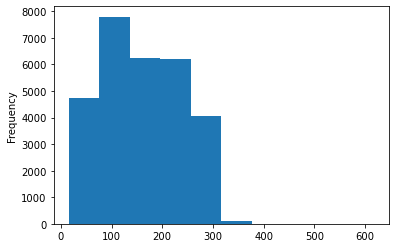

In [11]:
train['text_length'].plot.hist(bins = 10)

# 4) Cleaning - URL & Punctuation Removal

In [12]:
# URLs removal and extra spaces too

train['Comments'] = train['Comments'].apply(lambda x: re.sub(r'https?\S+', '', x).strip())

In [13]:
train.head(10)

,id,Comments,date,text_length
0,1.620207e+18,Latest Podcast is out now! - Balenciaga Is Run By Satanists | JUST THINK #5 via @YouTube | #Balenciagapedos #Balenciaga #satan #satanist #SATANIC #pedophelia #podcastshow #podcast #podcastlife #PodcastAndChill #podcaster #podcasting #lucifer #luciferian #h,2023-01-30 23:46:10+00:00,280
1,1.620206e+18,"Over 500 brands including #Gucci, #OffWhite, #Balenciaga, #MaisonMargiela, #MarineSerre, #SaintLaurent #fashion and many more",2023-01-30 23:44:31+00:00,173
2,1.620204e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #balenciaga #variety #stevemadden:,2023-01-30 23:33:43+00:00,197
3,1.620151e+18,@SKKN NOTHING! We don't support pedos and those who support child abuse and exploitation. #balenciaga #cancelkimkardashian #cancelskims ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®,2023-01-30 20:04:35+00:00,160
4,1.620142e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #madewell #balenciaga #kaileigh:,2023-01-30 19:30:19+00:00,195
5,1.620133e+18,WTF? Why is this happening??? #Balenciaga,2023-01-30 18:51:52+00:00,65
6,1.620127e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp from @kmullen1019 #poshmark #fashion #style #shopmycloset #balenciaga #freepeople #dannynicole:,2023-01-30 18:29:23+00:00,218
7,1.620118e+18,LETS TALK ABOUT BALENCIAGA ðŸ’€ #shorts #makeup #balenciaga via @YouTube,2023-01-30 17:51:43+00:00,96
8,1.620117e+18,Sadly it's much bigger than #Balenciaga #BalenciagaGate gotta start somewhere,2023-01-30 17:48:02+00:00,78
9,1.620115e+18,@skims All the bot replies should tell you something....we don't support pedos and the abuse of children. You dress your OWN CHILD in a GIMP mask and call it fashion. You're sick and satanic. #balenciaga #cancelskims #cancelkimkardashian ðŸ¤®ðŸ¤®ðŸ¤®ðŸ¤®ð,2023-01-30 17:42:35+00:00,255


In [14]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [15]:
train['Comments'].apply(remove_punctuations)

0                                                    Latest Podcast is out now  Balenciaga Is Run By Satanists  JUST THINK 5  via YouTube  Balenciagapedos Balenciaga satan satanist SATANIC pedophelia podcastshow podcast podcastlife PodcastAndChill podcaster podcasting lucifer luciferian h
1                                                                                                                                                                               Over 500 brands including Gucci OffWhite Balenciaga MaisonMargiela MarineSerre SaintLaurent fashion and many more
2                                                                                                                                                      So good I had to share Check out all the items Im loving on Poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden
3                                                                                                                                 

In [16]:
# Commit to Table
train['Comments'] = train['Comments'].apply(remove_punctuations)

<AxesSubplot:ylabel='Frequency'>

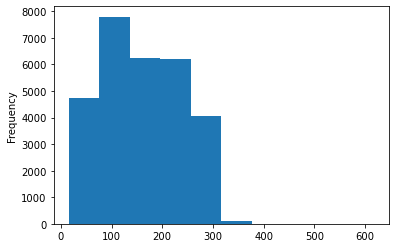

In [17]:
train['text_length'].plot.hist(bins = 10)

# 4) Cleaning - lower case

In [18]:
# Showing only
train['Comments'].apply(lambda x: x.lower())

0                                                    latest podcast is out now  balenciaga is run by satanists  just think 5  via youtube  balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h
1                                                                                                                                                                               over 500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion and many more
2                                                                                                                                                      so good i had to share check out all the items im loving on poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden
3                                                                                                                                 

In [19]:
# Commit to Table
train['Comments'] = train['Comments'].apply(lambda x: x.lower())

In [20]:
train.head(20)

,id,Comments,date,text_length
0,1.620207e+18,latest podcast is out now balenciaga is run by satanists just think 5 via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,2023-01-30 23:46:10+00:00,280
1,1.620206e+18,over 500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion and many more,2023-01-30 23:44:31+00:00,173
2,1.620204e+18,so good i had to share check out all the items im loving on poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden,2023-01-30 23:33:43+00:00,197
3,1.620151e+18,skkn nothing we dont support pedos and those who support child abuse and exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®,2023-01-30 20:04:35+00:00,160
4,1.620142e+18,so good i had to share check out all the items im loving on poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh,2023-01-30 19:30:19+00:00,195
5,1.620133e+18,wtf why is this happening balenciaga,2023-01-30 18:51:52+00:00,65
6,1.620127e+18,so good i had to share check out all the items im loving on poshmarkapp from kmullen1019 poshmark fashion style shopmycloset balenciaga freepeople dannynicole,2023-01-30 18:29:23+00:00,218
7,1.620118e+18,lets talk about balenciaga ðÿ’€ shorts makeup balenciaga via youtube,2023-01-30 17:51:43+00:00,96
8,1.620117e+18,sadly its much bigger than balenciaga balenciagagate gotta start somewhere,2023-01-30 17:48:02+00:00,78
9,1.620115e+18,skims all the bot replies should tell you somethingwe dont support pedos and the abuse of children you dress your own child in a gimp mask and call it fashion youre sick and satanic balenciaga cancelskims cancelkimkardashian ðÿ¤®ðÿ¤®ðÿ¤®ðÿ¤®ð,2023-01-30 17:42:35+00:00,255


# 5) Cleaning - Remove Stopwords ,numbers, emoticons & special characters

In [21]:
# Get Stopwords
stop = stopwords.words('english')

In [22]:
# Tokenize and Remove Stop Words
train['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0        [latest, podcast, balenciaga, run, satanists, think, 5, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]
1                                                                                                                                    [500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many]
2                                                                                                                     [good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden]
3                                                                                                 [skkn, nothing, dont, support, pedos, support, child, abuse, exploitation, balenciaga, cancelkimkardashian, cancelskims, ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®]
4                   

In [23]:
train['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0        latest podcast balenciaga run satanists think 5 via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h
1                                                                                                                       500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many
2                                                                                                           good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden
3                                                                                      skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®
4                                                                                                             good share

In [24]:
# Join the words back
train['Comments'] = train['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [25]:
train.head(10)

,id,Comments,date,text_length
0,1.620207e+18,latest podcast balenciaga run satanists think 5 via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,2023-01-30 23:46:10+00:00,280
1,1.620206e+18,500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many,2023-01-30 23:44:31+00:00,173
2,1.620204e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden,2023-01-30 23:33:43+00:00,197
3,1.620151e+18,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®,2023-01-30 20:04:35+00:00,160
4,1.620142e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh,2023-01-30 19:30:19+00:00,195
5,1.620133e+18,wtf happening balenciaga,2023-01-30 18:51:52+00:00,65
6,1.620127e+18,good share check items im loving poshmarkapp kmullen1019 poshmark fashion style shopmycloset balenciaga freepeople dannynicole,2023-01-30 18:29:23+00:00,218
7,1.620118e+18,lets talk balenciaga ðÿ’€ shorts makeup balenciaga via youtube,2023-01-30 17:51:43+00:00,96
8,1.620117e+18,sadly much bigger balenciaga balenciagagate gotta start somewhere,2023-01-30 17:48:02+00:00,78
9,1.620115e+18,skims bot replies tell somethingwe dont support pedos abuse children dress child gimp mask call fashion youre sick satanic balenciaga cancelskims cancelkimkardashian ðÿ¤®ðÿ¤®ðÿ¤®ðÿ¤®ð,2023-01-30 17:42:35+00:00,255


In [26]:
##Remove emoticons

def remove_emoticons(text):
    emoticon_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\u2764"  
        u"\U0001F644"                            
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                                  
                           "]+", flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text)



In [27]:

# Apply the remove_emoticons function to the 'Comments' column
train['Comments'] = train['Comments'].apply(remove_emoticons)

In [30]:
##Remove numbers

train['Comments'] = train['Comments'].apply(lambda x: re.sub(r'\d+', '', x))

In [31]:
train.head(20)

,id,Comments,date,text_length
0,1.620207e+18,latest podcast balenciaga run satanists think via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,2023-01-30 23:46:10+00:00,280
1,1.620206e+18,brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many,2023-01-30 23:44:31+00:00,173
2,1.620204e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden,2023-01-30 23:33:43+00:00,197
3,1.620151e+18,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®,2023-01-30 20:04:35+00:00,160
4,1.620142e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh,2023-01-30 19:30:19+00:00,195
5,1.620133e+18,wtf happening balenciaga,2023-01-30 18:51:52+00:00,65
6,1.620127e+18,good share check items im loving poshmarkapp kmullen poshmark fashion style shopmycloset balenciaga freepeople dannynicole,2023-01-30 18:29:23+00:00,218
7,1.620118e+18,lets talk balenciaga ðÿ’€ shorts makeup balenciaga via youtube,2023-01-30 17:51:43+00:00,96
8,1.620117e+18,sadly much bigger balenciaga balenciagagate gotta start somewhere,2023-01-30 17:48:02+00:00,78
9,1.620115e+18,skims bot replies tell somethingwe dont support pedos abuse children dress child gimp mask call fashion youre sick satanic balenciaga cancelskims cancelkimkardashian ðÿ¤®ðÿ¤®ðÿ¤®ðÿ¤®ð,2023-01-30 17:42:35+00:00,255


In [32]:
##Remove non-ASCII improperly encoded characters

def remove_invalid_chars(text):
    # encode the text string using ASCII encoding
    encoded_text = text.encode('ascii', 'ignore')
    # decode the encoded text using ASCII encoding
    decoded_text = encoded_text.decode('ascii')
    return decoded_text

In [33]:
# apply the remove_invalid_chars function to the 'Comments' column
train['Comments'] = train['Comments'].apply(remove_invalid_chars)



In [34]:
train.head(90)

,id,Comments,date,text_length
0,1.620207e+18,latest podcast balenciaga run satanists think via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,2023-01-30 23:46:10+00:00,280
1,1.620206e+18,brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many,2023-01-30 23:44:31+00:00,173
2,1.620204e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden,2023-01-30 23:33:43+00:00,197
3,1.620151e+18,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims,2023-01-30 20:04:35+00:00,160
4,1.620142e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh,2023-01-30 19:30:19+00:00,195
...,...,...,...,...
85,1.619554e+18,evillysexybitch tuxlemons elonmusk umm shopping balenciaga today wearing german military shirt praising hitler genius even though hitler would killed him wrong,2023-01-29 04:31:40+00:00,215
86,1.619551e+18,image perfectly describes lifestyle balenciaga,2023-01-29 04:21:43+00:00,79
87,1.619539e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga koalakids anthropologie,2023-01-29 03:33:22+00:00,201
88,1.619527e+18,tuxlemons yes kanyewest lost account id say telling truth anout balenciaga involvement childsextraffickingsurely fact elonmusk forgive plus call lot unpleasant,2023-01-29 02:43:47+00:00,255


# 6)Lemmatize

In [35]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [37]:
# Lemmatize
train['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

0        latest podcast balenciaga run satanists think  via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h
1                                                                                                                          brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many
2                                                                                                          good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden
3                                                                                                             skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims 
4                                                                                                            good share chec

In [38]:
# Commit to Table

train['Comments'] = train['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

In [39]:
train.head()

,id,Comments,date,text_length
0,1.620207e+18,latest podcast balenciaga run satanists think via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,2023-01-30 23:46:10+00:00,280
1,1.620206e+18,brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many,2023-01-30 23:44:31+00:00,173
2,1.620204e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden,2023-01-30 23:33:43+00:00,197
3,1.620151e+18,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims,2023-01-30 20:04:35+00:00,160
4,1.620142e+18,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh,2023-01-30 19:30:19+00:00,195


## 7) POS Tagging

In [40]:
# Download the required NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [42]:
# Apply the POS tagging function to the 'Comments' column
train['POS_Tagged'] = train['Comments'].apply(pos_tagging)

In [43]:
train['POS_Tagged']

0        [(latest, JJS), (podcast, NN), (balenciaga, NN), (run, VBP), (satanists, NNS), (think, VBP), (via, IN), (youtube, NN), (balenciagapedos, NN), (balenciaga, NN), (satan, JJ), (satanist, NN), (satanic, JJ), (pedophelia, NN), (podcastshow, NN), (podcast, JJ), (podcastlife, NN), (podcastandchill, NN), (podcaster, NN), (podcasting, VBG), (lucifer, NN), (luciferian, JJ), (h, NN)]
1                                                                                                                                                                                                                       [(brands, NNS), (including, VBG), (gucci, JJ), (offwhite, JJ), (balenciaga, NN), (maisonmargiela, NN), (marineserre, JJ), (saintlaurent, JJ), (fashion, NN), (many, JJ)]
2                                                                                                                                                                           [(good, JJ), (share, NN), (check, VB), (items, NNS), (im, 